# Ozone Weather Analysis

### Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import warnings
warnings.filterwarnings('ignore')

### Reading data

In [51]:
df = pd.read_csv('weather_data.csv')

### Data Exploration

In [52]:
df.head(2)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C


In [53]:
df.shape

(161, 10)

In [54]:
df.size

1610

In [55]:
df[:1]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  161 non-null    int64  
 1   Ozone       123 non-null    float64
 2   Solar.R     154 non-null    float64
 3   Wind        161 non-null    float64
 4   Temp C      161 non-null    object 
 5   Month       161 non-null    object 
 6   Day         161 non-null    int64  
 7   Year        161 non-null    int64  
 8   Temp        161 non-null    int64  
 9   Weather     158 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.7+ KB


In [57]:
df.head(2)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C


In [58]:
df.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,161.000000,123.000000,154.000000,161.000000,161.000000,161.0,161.000000
mean,80.391304,41.837398,185.642857,9.903106,15.950311,2025.0,77.739130
std,46.121738,32.674343,88.237623,3.503274,9.066285,0.0,9.397155
min,1.000000,1.000000,7.000000,1.700000,1.000000,2025.0,56.000000
25%,41.000000,18.000000,121.750000,7.400000,8.000000,2025.0,72.000000
50%,80.000000,31.000000,195.500000,9.700000,16.000000,2025.0,78.000000
75%,120.000000,62.000000,257.500000,11.500000,24.000000,2025.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2025.0,97.000000


### Data Preperation

In [59]:
df.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar.R        7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

In [60]:
df.describe(include = 'object')

,Temp C,Month,Weather
count,161,161,158
unique,41,6,3
top,76,9,S
freq,11,35,59


#### Dealing with duplicate values

In [61]:
df.duplicated().sum()

3

In [62]:
df.drop_duplicates( inplace = True)

In [63]:
df.duplicated().sum()

0

### Dropping irrelevant column

In [64]:
df.head(2)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C


In [65]:
df.drop(['Unnamed: 0'],axis =1 , inplace = True)

In [66]:
df.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2025,67,S
1,36.0,118.0,8.0,72,5,2,2025,72,C
2,12.0,149.0,12.6,74,5,3,2025,74,PS
3,18.0,313.0,11.5,62,5,4,2025,62,S
4,NaN,NaN,14.3,56,5,5,2025,56,S


In [67]:
df.drop(['Temp C'], axis = 1, inplace = True)

In [68]:
df.head(2)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 159
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 11.1+ KB


#### Data transformation

In [70]:
df.Month.unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [71]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S


In [72]:
df.rename({"Solar.R":'Solar'},axis = 1, inplace = True)

In [73]:
df.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S


In [74]:
df.Month.unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [75]:
df.Month.replace({'May':'5'},inplace = True)

In [76]:
df.Month.unique()

array(['5', '6', '7', '8', '9'], dtype=object)

#### Dealing with null values

In [77]:
df.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [78]:
mean = df['Solar'].mean()

In [79]:
df['Solar'] = df['Solar'].fillna(mean)

In [80]:
df.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.000000,7.4,5,1,2025,67,S
1,36.0,118.000000,8.0,5,2,2025,72,C
2,12.0,149.000000,12.6,5,3,2025,74,PS
3,18.0,313.000000,11.5,5,4,2025,62,S
4,NaN,185.403974,14.3,5,5,2025,56,S


In [81]:
df['Date'] = pd.to_datetime(df[['Year','Month','Day']])

In [82]:
df.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.000000,7.4,5,1,2025,67,S,2025-05-01
1,36.0,118.000000,8.0,5,2,2025,72,C,2025-05-02
2,12.0,149.000000,12.6,5,3,2025,74,PS,2025-05-03
3,18.0,313.000000,11.5,5,4,2025,62,S,2025-05-04
4,NaN,185.403974,14.3,5,5,2025,56,S,2025-05-05


#### Dealing with outliers

<Axes: >

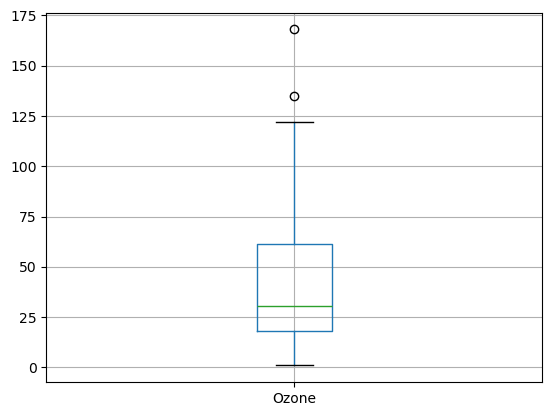

In [83]:
df.boxplot(column='Ozone')

**Observation -**

As You see there are 2 outliers present in Ozone column.


In [84]:
df['Ozone'].describe()

count    120.000000
mean      41.583333
std       32.620709
min        1.000000
25%       18.000000
50%       30.500000
75%       61.500000
max      168.000000
Name: Ozone, dtype: float64

In [85]:
#IQR

IQR = 61.500 - 18.000

In [86]:
max_limit = 61.500 + 1.5*IQR
max_limit

126.75

In [87]:
df[df['Ozone']>max_limit]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
61,135.0,269.0,4.1,7,1,2025,84,S,2025-07-01
117,168.0,238.0,3.4,8,25,2025,81,PS,2025-08-25


#### Univariate Analysis

In [88]:
df.dtypes

Ozone             float64
Solar             float64
Wind              float64
Month              object
Day                 int64
Year                int64
Temp                int64
Weather            object
Date       datetime64[ns]
dtype: object

In [89]:
df.Weather.unique()

array(['S', 'C', 'PS', nan], dtype=object)

In [90]:
df.Weather = df.Weather.map({'S':'Sunny','PS':'Partial Sunny','C' : 'Cloudy'})

In [91]:
df.Weather.unique()

array(['Sunny', 'Cloudy', 'Partial Sunny', nan], dtype=object)

In [92]:
df.Weather.value_counts()

Weather
Sunny            59
Cloudy           49
Partial Sunny    47
Name: count, dtype: int64

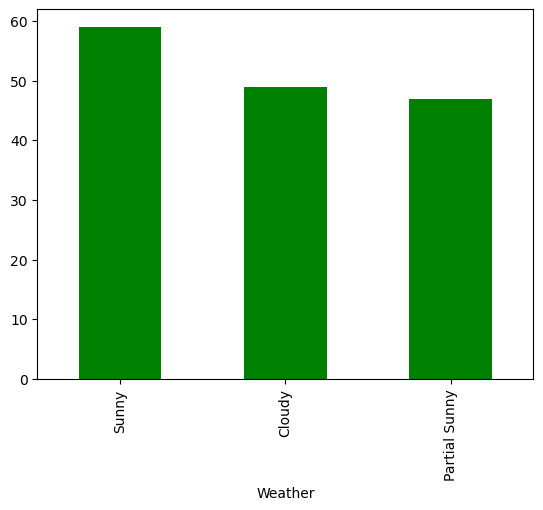

In [93]:
df.Weather.value_counts().plot(kind = 'bar', color = 'green')
plt.show()

In [94]:
df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather',
       'Date'],
      dtype='object')

In [96]:
df['Month'].astype(int)

0      5
1      5
2      5
3      5
4      5
      ..
154    5
156    9
157    9
158    9
159    9
Name: Month, Length: 158, dtype: int32

<Axes: xlabel='Weather'>

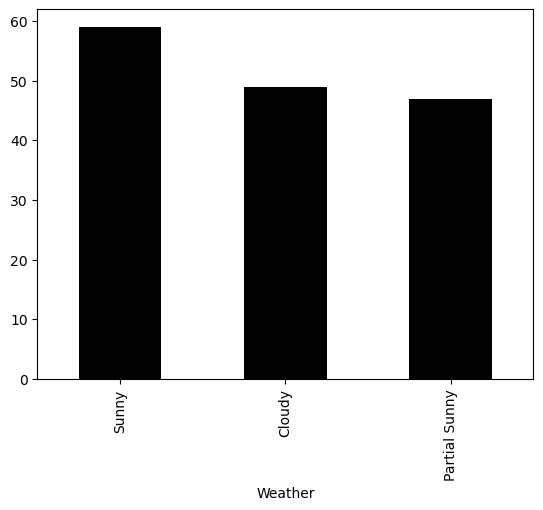

In [101]:
df.Weather.value_counts().plot(kind = 'bar', color = 'black')

In [102]:
df.var(numeric_only=True)

Ozone    1064.110644
Solar    7520.817564
Wind       12.328955
Day        80.949004
Year        0.000000
Temp       87.944570
dtype: float64

In [105]:
# Skewness

skew = df.skew(numeric_only=True)
skew

Ozone    1.282000
Solar   -0.426086
Wind     0.349332
Day     -0.036407
Year     0.000000
Temp    -0.340108
dtype: float64

<Axes: ylabel='Frequency'>

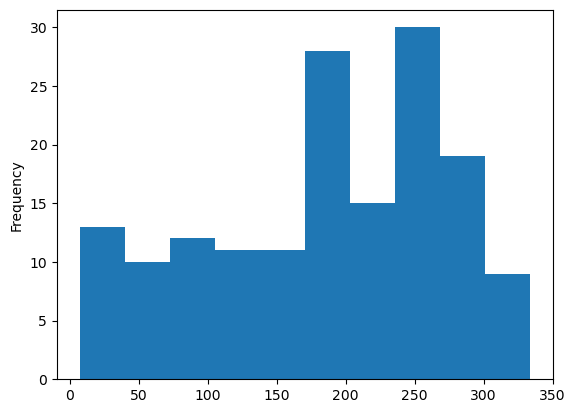

In [107]:
df['Solar'].plot(kind = 'hist')

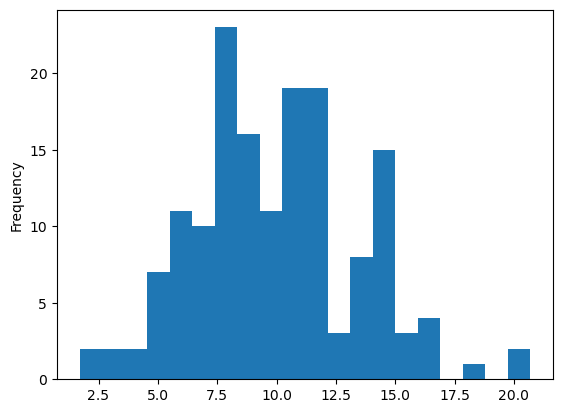

In [110]:
df.Wind.plot(kind = 'hist',bins = 20)
plt.show()

<Axes: >

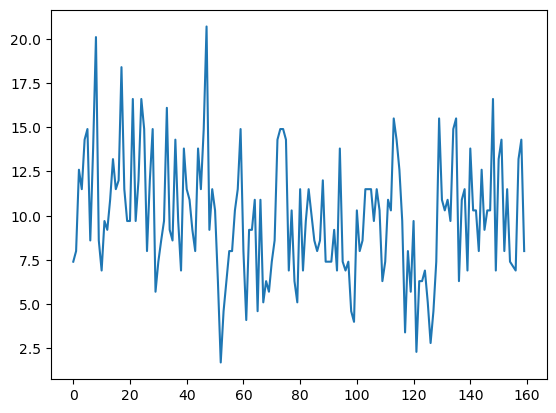

In [111]:
df.Wind.plot(kind = 'line')

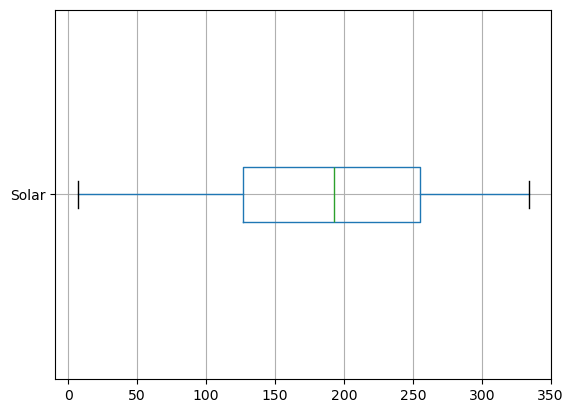

In [115]:
df.boxplot(column = 'Solar', vert = False)
plt.show()

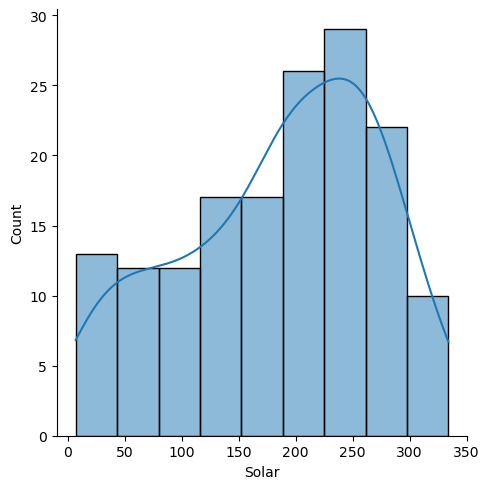

In [119]:
sns.displot(data = df, x= 'Solar', kind = 'hist', kde = True)
plt.show()

<Axes: xlabel='Wind'>

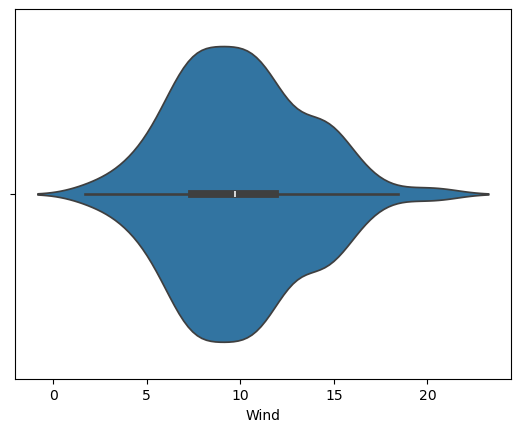

In [121]:
sns.violinplot(data = df, x = 'Wind')

### Bivariate & Multi variate Analysis

#### Numerical vs Numerical

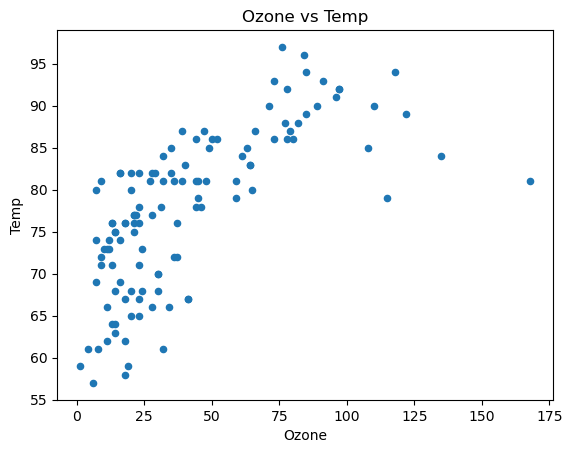

In [124]:
df.plot(kind = 'scatter', x = 'Ozone', y = 'Temp')
plt.title('Ozone vs Temp')
plt.show()

**Observation '**

Ozone & Temp are co- related to each other

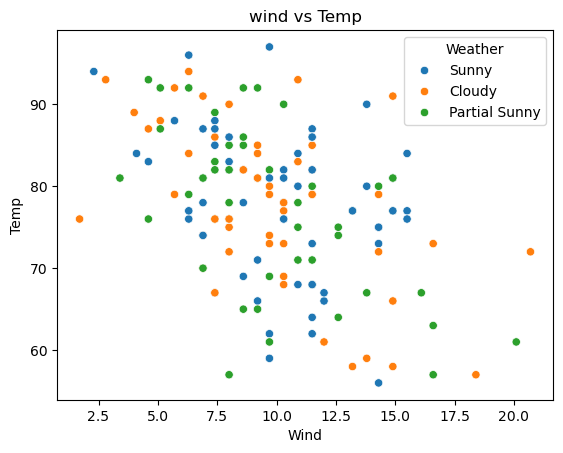

In [136]:
sns.scatterplot(data = df, x = 'Wind', y = 'Temp', hue = 'Weather')
plt.title('wind vs Temp')
plt.show()

In [138]:
df1 = df.drop(['Year'],axis = 1)

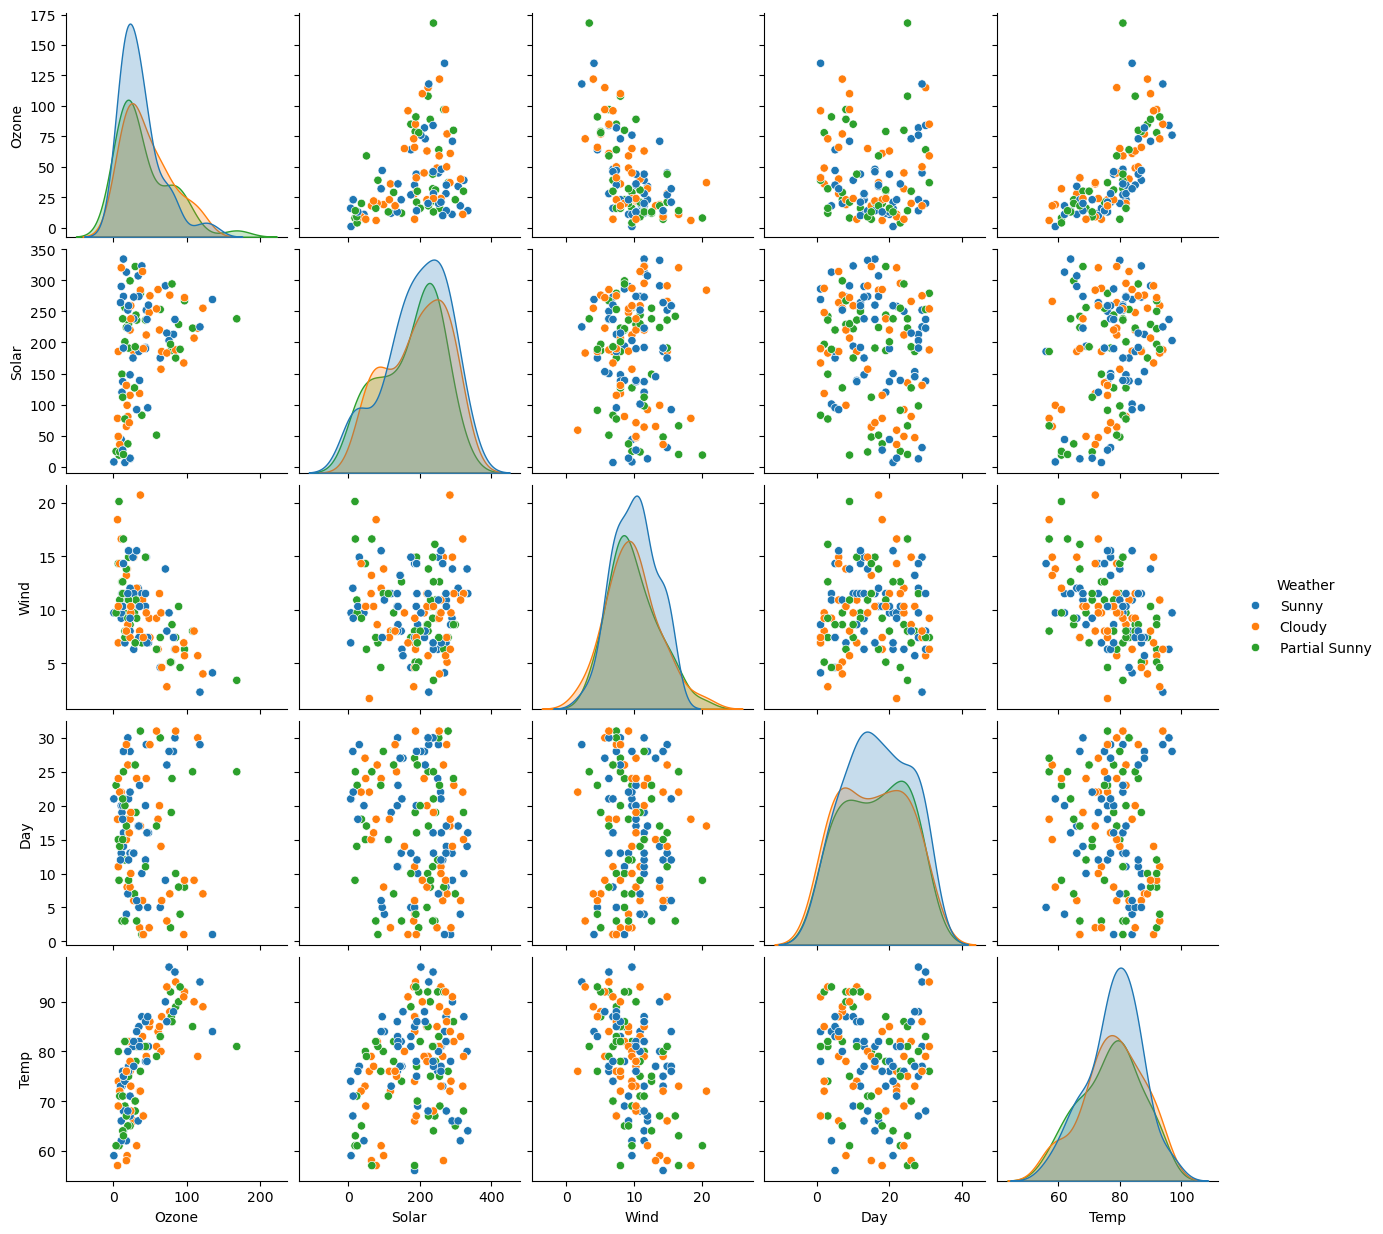

In [140]:
sns.pairplot(data = df1, hue = 'Weather')

In [142]:
corr = df1.corr(numeric_only=True)
corr

,Ozone,Solar,Wind,Day,Temp
Ozone,1.000000,0.344019,-0.593530,-0.035055,0.694098
Solar,0.344019,1.000000,-0.055092,-0.149606,0.260473
Wind,-0.593530,-0.055092,1.000000,0.040151,-0.441247
Day,-0.035055,-0.149606,0.040151,1.000000,-0.124538
Temp,0.694098,0.260473,-0.441247,-0.124538,1.000000


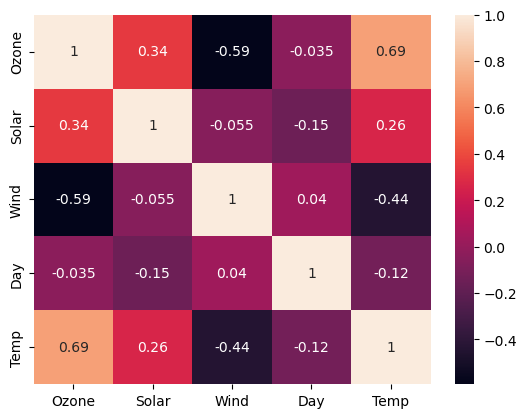

In [146]:
sns.heatmap(corr, annot = True )
plt.show()

#### Cat vs Num

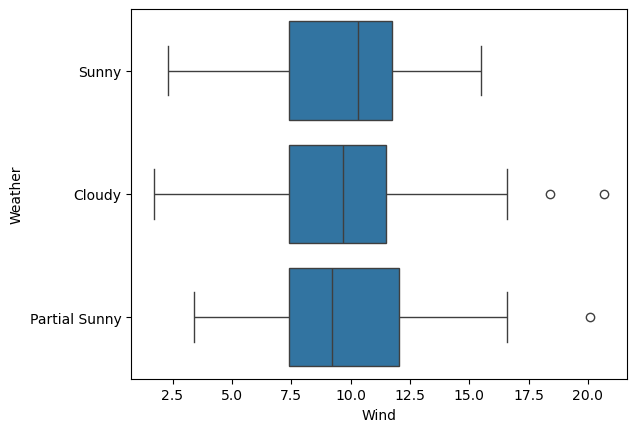

In [148]:
sns.boxplot(data = df, x = 'Wind', y = 'Weather')
plt.show()

**Observation -**

As you see 2 outlier in Cloudy & 1 outlier in Partial sunny 

In [149]:
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.000000,7.4,5,1,2025,67,Sunny,2025-05-01
1,36.0,118.000000,8.0,5,2,2025,72,Cloudy,2025-05-02
2,12.0,149.000000,12.6,5,3,2025,74,Partial Sunny,2025-05-03
3,18.0,313.000000,11.5,5,4,2025,62,Sunny,2025-05-04
4,NaN,185.403974,14.3,5,5,2025,56,Sunny,2025-05-05
...,...,...,...,...,...,...,...,...,...
154,41.0,190.000000,7.4,5,1,2025,67,Cloudy,2025-05-01
156,30.0,193.000000,6.9,9,26,2025,70,Partial Sunny,2025-09-26
157,NaN,145.000000,13.2,9,27,2025,77,Sunny,2025-09-27
158,14.0,191.000000,14.3,9,28,2025,75,Sunny,2025-09-28


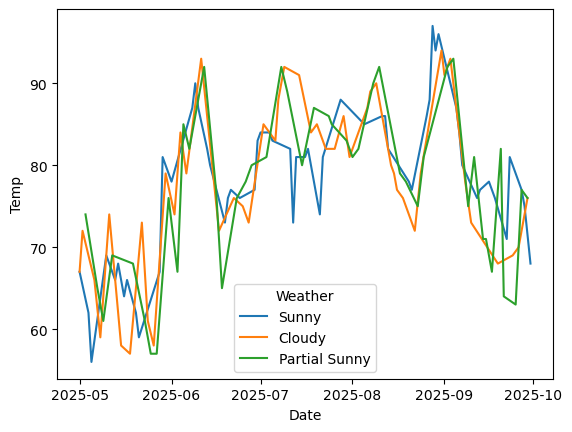

In [153]:
sns.lineplot(data = df, x = 'Date', y = 'Temp', markers='o', hue = 'Weather')
plt.show()

In [154]:
pd.crosstab(df['Month'], df['Weather'])

Weather,Cloudy,Partial Sunny,Sunny
Month,,,
5,11,9,12
6,9,9,12
7,11,8,11
8,10,8,11
9,8,13,13


In [156]:
df.groupby('Weather')[['Ozone','Wind']].mean(numeric_only=True)

,Ozone,Wind
Weather,,
Cloudy,46.162162,9.783673
Partial Sunny,42.194444,9.908511
Sunny,36.909091,10.093220


In [158]:
df.groupby('Weather')[['Ozone','Wind']].describe()

Ozone                                                       \
              count       mean        std  min   25%   50%    75%    max   
Weather                                                                    
Cloudy         37.0  46.162162  32.593041  6.0  22.0  37.0  65.00  122.0   
Partial Sunny  36.0  42.194444  37.225045  4.0  16.0  29.5  67.50  168.0   
Sunny          44.0  36.909091  28.789386  1.0  15.5  28.0  45.25  135.0   

               Wind                                                    
              count       mean       std  min  25%   50%    75%   max  
Weather                                                                
Cloudy         49.0   9.783673  3.869450  1.7  7.4   9.7  11.50  20.7  
Partial Sunny  47.0   9.908511  3.612348  3.4  7.4   9.2  12.05  20.1  
Sunny          59.0  10.093220  3.177880  2.3  7.4  10.3  11.75  15.5

# Questions on Dataframe

In [164]:
df[df['Ozone'] > 41].sort_values(by = 'Ozone')

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
112,44.0,190.000000,10.3,8,20,2025,78,Sunny,2025-08-20
104,44.0,192.000000,11.5,8,12,2025,86,Sunny,2025-08-12
134,44.0,236.000000,14.9,9,11,2025,81,Partial Sunny,2025-09-11
28,45.0,252.000000,14.9,5,29,2025,81,Sunny,2025-05-29
116,45.0,212.000000,9.7,8,24,2025,79,Cloudy,2025-08-24
139,46.0,237.000000,6.9,9,16,2025,78,Sunny,2025-09-16
128,47.0,95.000000,7.4,9,5,2025,87,Sunny,2025-09-05
76,48.0,260.000000,6.9,7,16,2025,81,Sunny,2025-07-16
62,49.0,248.000000,9.2,7,2,2025,85,Cloudy,2025-07-02
90,50.0,275.000000,7.4,7,29,2025,86,Cloudy,2025-07-29


In [167]:
# What are avg values of numerical features for Sunny Weather?

df[df['Weather'] == 'Sunny'].mean(numeric_only=True)


Ozone      36.909091
Solar     193.064541
Wind       10.093220
Day        16.661017
Year     2025.000000
Temp       78.067797
dtype: float64

In [173]:
df.Month.info

<bound method Series.info of 0      5
1      5
2      5
3      5
4      5
      ..
154    5
156    9
157    9
158    9
159    9
Name: Month, Length: 158, dtype: object>

In [175]:
# What is the avg temp during the month of June when the weather is cloudy

df[(df['Month'] == '6')&(df['Weather']== 'Cloudy')]['Temp'].mean()

78.33333333333333

In [177]:
# What is the maximum wind speed during July when day is sunny?


df[(df['Month'] == '6')&(df['Weather'] == 'Cloudy')]['Wind'].max()

20.7